#### Assignment 2 ML_Group23
##### Members: Joachim Leiros, Andreas Seljeset, Sindre Holtan

# Frame the problem and look at the big picture

In this assignment we are to build a model of housing prices in Ames, Iowa using some census data that is provided. Our model will learn from the data and be able to predict the house value based upon data from other houses in the provided data. 

The end result is that we want to create a deployed system which with machine learning can predict the price of a house with feature values specified by the end-user. 

The data is collected from the Kaggle competition:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
#First, we import libraries that we will use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pathlib import Path
from joblib import dump

NB_DIRECTORY = Path.cwd()
DATA_DIRECTORY = NB_DIRECTORY/'..' /'data'

# #1 Get the data

We start by importing the data that we obtained from Kaggle. We have a training and test set based upon the same data. There is also supplied a text document containing descriptions of all the values of the data. The description document will not be used for the machine learning model itself, but parts of it will be supplied so that the end user knows what values to input into the system in order to get a prediction.

In [2]:
#Training data
trainOrig = pd.read_csv(DATA_DIRECTORY/'train.csv')
train = trainOrig.copy()

In [3]:
#Test data
testOrig = pd.read_csv(DATA_DIRECTORY/'test.csv')
test = testOrig.copy()

#We make a copy of the data files so that we don't alter the original data during our operations.

In [4]:
#Training set
trainOrig

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
#Test set
#We note that the Test_set has an ID column which we will use later for the submission.
testOrig

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# #2 Explore the data go gain insights

Let's look at the data to gain some insights before we start so that we can prepare to look for
correlations.

In [6]:
trainOrig.head()

#First, let's take a quick peek at the head of the training set to see how data is structured. 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
trainOrig.describe()

# We describe() the full set to obtain a summary of all numerical attributes of the dataset. 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
trainOrig.info()

#Then, let's get a description of the data. This includes the type of attributes, and number of rows as well
#non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We note that there are 1460 rows of data and 78 features, exluding the ID and SalePrice. Some of the fields have empty cells while a few have a majority of the cells empty (Fence, PoolQC, MiscFeature and Alley). FirePlaceQu only have ~half the cells filled with values. 

In [9]:
# We do the same for the test-set. We check the head, the description and info. 

testOrig.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
testOrig.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
testOrig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

We note that the test set only contains 78 different features, excluding the ID, SalePrice is not included. 

The same applies here, PoolQC, Fence, Alley and MiscFeature lack a lot of values while FireplaceQu lack ~half. We will have to consider how we will handle these values later.

# #3 Looking for correlations
Now that we have explored the data and gained some insights it's time to dive further into the data
and look for correlations between the data. 

Since we want to predict the price of houses, we start by computing a correlation coefficient between the [SalePrice] and the other attributes by using the corr() method on the train's [SalePrice].

In [12]:
#Let's reset the training set.
train = trainOrig.copy()

In [13]:
correlation_matrix = train.corr()
correlation_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

The correlation coefficient is described going from -1 to 1. When the coefficient is low, closer to -1 there is negative correlation. If the value is high, closer to 1, there is a positive correlation between the values. If the value is closer to 0, there is little correlation at all. 

From the data above we can see that the OverallQual has the strongest positive correlation on SalePrice followed by GrLivArea. There are a few other values which have good correlation with the SalePrice. An idea for the deployed system is to pick a few of these for the user to input so that it's user friendly and the end-user doesn't have to input a lot of values in order to get a prediction.

On the other side, features such as ScreenPorch, PoolArea, MoSold, BsmtFinSF2, BsmtHalfBath, ... , MSSubClass have weak correlation to the saleprice.

We might remove some of these features in order to keep the machine learning model simple and focused on the features that have stronger correlations on the saleprice. 

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='TotalBsmtSF', y

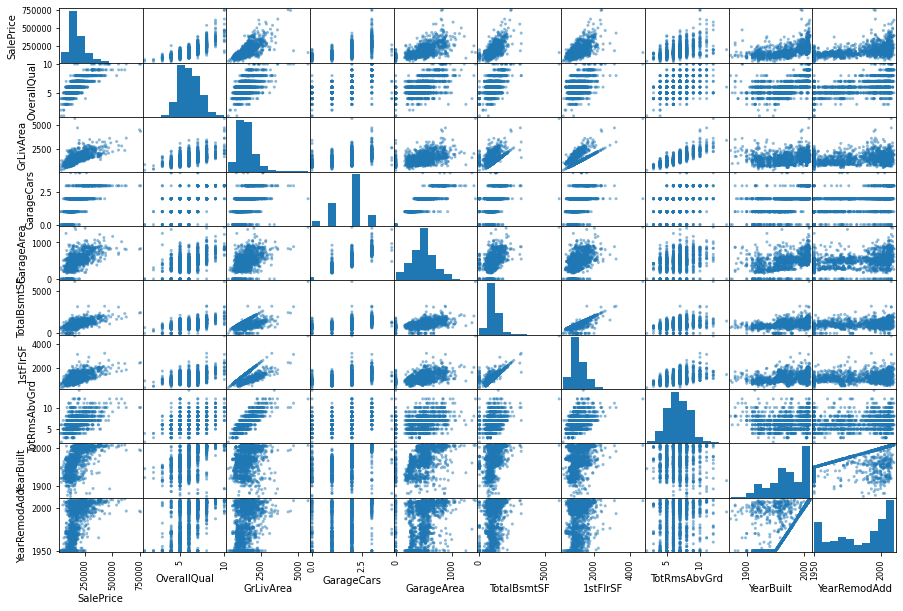

In [14]:
from pandas.plotting import scatter_matrix
# Let's plot the 10 strongest correlators.

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", 
              "TotalBsmtSF", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]
scatter_matrix(train[attributes], figsize=(15,10))

We can see that a lof of the graphs are similar, but there is also several outliers in many of the graphs.
It's kind of hard to study the graph when it is so small so let's focus a bit on the saleprice along with the two strongest correlators. 

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>]],
      dtype=object)

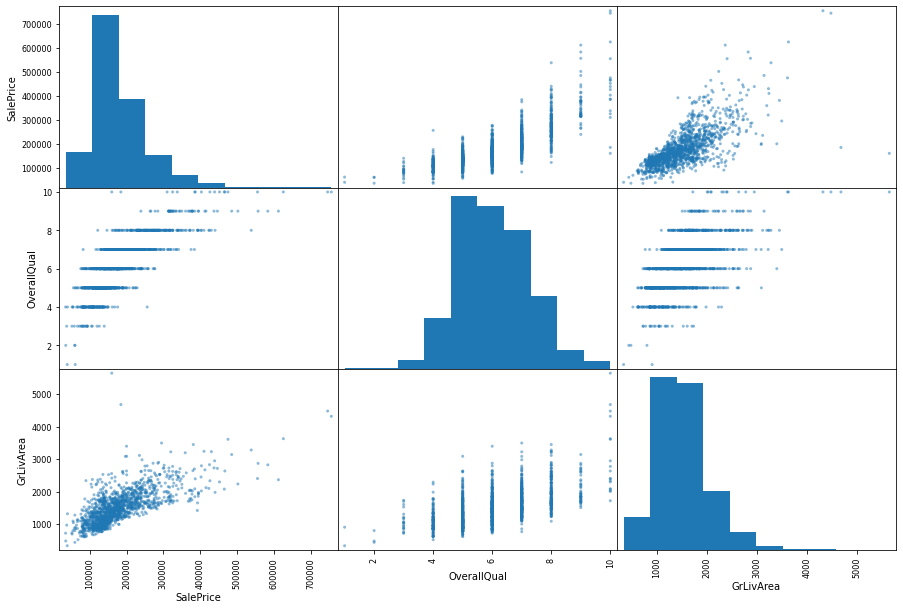

In [15]:
attributes = ["SalePrice", "OverallQual", "GrLivArea"]
scatter_matrix(train[attributes], figsize=(15,10))

We can see that in the relationship of [SalePrice] and [GrLivArea] have some outliers, the same with [OverallQual]. Let's focus a bit more in order to get a better representation. 

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

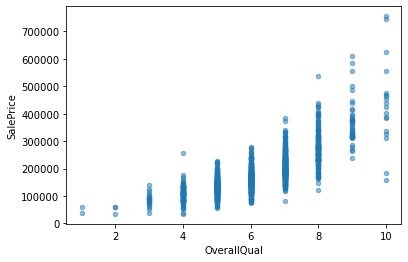

In [16]:
train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

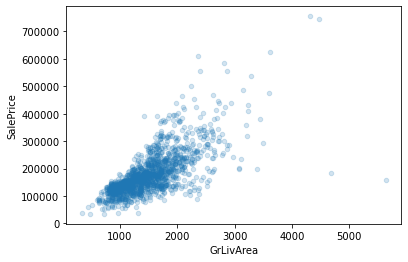

In [17]:
train.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.2)

The [GrLivArea] and [OverallQual] does indeed contain multiple utliers. 

In [GrLivArea] there are four houses that were sold that had a [GrLivArea] much higher than then average house. Two off the houses where sold with the highest recorded [SalePrice]. 

Such extreme outliers can be detrimental to the machine learning model. So we  we do not want the model to use these outliers to create a model. We restrict our data and remove all occurenses where [GrLivArea] is greater than 4000. 

In [OverallQual] two houses which has sold for over 700000. These outliers are not as extreme as the ones from [GrLivArea] but. We decided to keep the houses in the data.

Our dataset has 78 Since there are very many features it would be smart to check if there could be multiple features suffering from outliers. 

We decided to pick three of the other strong correlators to check for outliers. 

[GarageCars]

[GarageArea]

[TotalBsmtSF]

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='GarageCars'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GarageArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='GarageArea'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='GarageArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='TotalBsmtSF'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='TotalBsmtSF'>,
        <AxesSubplot:xlabel='TotalBsmtS

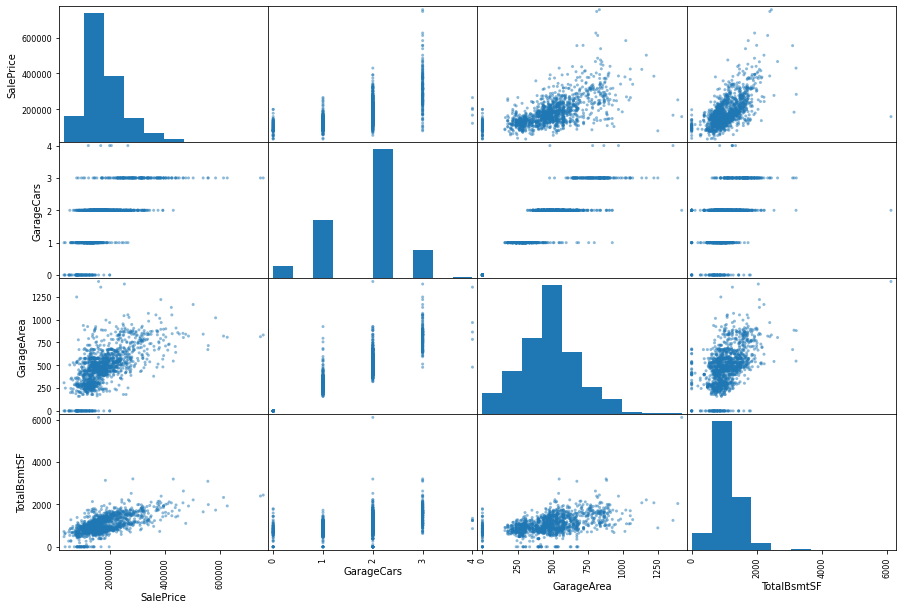

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "GarageCars", "GarageArea", "TotalBsmtSF"]
scatter_matrix(train[attributes], figsize=(15,10))

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

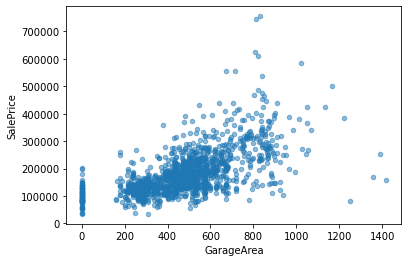

In [19]:
train.plot(kind="scatter", x="GarageArea", y="SalePrice", alpha=0.5)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

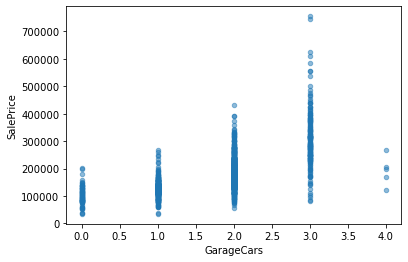

In [20]:
train.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

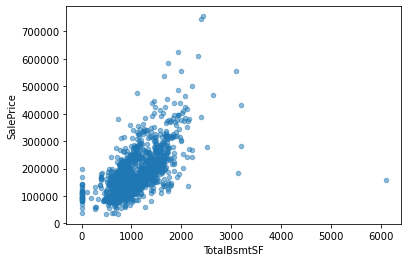

In [21]:
train.plot(kind="scatter", x="TotalBsmtSF", y="SalePrice", alpha=0.5)

There are some outliers here as well, very few garages have four cars or an area above 1100sqft. Basement area also has some outliers where there are a total of five basements larger than 3000 sqft.

We will further restrict the data by:

[GarageCars] : Remove occurences where GarageCars = 4.

[GarageArea] : Remove occurences where GarageArea > 1100sqft.

[TotalBsmtSF] : Remove occurences where TotalBsmtSF > 3000sqft.

# #4 Prepare the data to better expose the underlying data patterns to machine learning algorithms

In [22]:
# Let's reset the training set and extract the SalePrice from it so that both sets featureset match.
# We will also use the SalePrice to compare on later. 
train = trainOrig.copy()
train_ID = train['Id']
train = train.drop("Id", axis=1)

# Let's also do the same for the test set.
test_ID = test['Id']
cleaned_test = test.copy()
cleaned_test = cleaned_test.drop("Id", axis=1)

Earlier we noted that we had some features which was lacking a lot of data in the sets. Since there is so few entries it's not feasible to calculate and use a median so we decided to drop the features instead. 

We also noted that FireplaceQu lacked entries for almost half the rows. In this project we decided to let it be and rather calculate the median value for the feature. 

Features to drop: PoolQC, Fence, Alley and MiscFeature

In [23]:
cleaned_test = cleaned_test.drop(["PoolQC","Fence","Alley","MiscFeature"], axis=1)
train        = train.drop(["PoolQC","Fence","Alley","MiscFeature"], axis=1)

We also noted that there was some categories where we had outliers. We decided to restrict the data in order to improve our predictions and reduce skew. 

Features to restrict: 

[GrLivArea] greater than 4000sqft

[GarageCars] 4 cars or more

[GarageArea] greater than 1100sqft

[TotalBsmtSF] greater than 3000sqft

In [24]:
train = train[train['GrLivArea']<4000]
train = train[train['GarageCars']<4]
train = train[train['GarageArea']<1100]
train = train[train['TotalBsmtSF']<3000]

Now after we have restricted the data it is safe for us to extract the [SalePrice] from the training set.

In [25]:
train_labels = train["SalePrice"].copy()
train = train.drop("SalePrice", axis=1)

### Transformational Pipelines

It is important when transforming data that we do it in the correct order. The Pipeline class helps with performing the transformations in the correct sequence. 

We saw earlier that we had null values in different features. Most machine learning models don't like null values so we will fill in the blanks with median of the feature. However a median can only be calculated for the numerical values so we will have to separate the numerical and categorical features before we can calculate the median. 

We start out using the pipeline to transform the numerical attributes with the standardscaler.

In [26]:
# Let's import a couple of tools we will be using to create the transformational pipeline.
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [27]:
#Finding colums where the dtype is [object].
list(train.select_dtypes(['object']).columns)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [28]:
#We separate the numerical values into train_num

train_num = train.drop(["MSZoning", "Street", "LotShape", "LandContour", "Utilities", 
                        "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", 
                        "BldgType", "HouseStyle", "RoofStyle","RoofMatl", "Exterior1st", 
                        "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", 
                        "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                        "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", 
                        "Functional","FireplaceQu", "GarageType", "GarageFinish", "GarageQual", 
                        "GarageCond", "PavedDrive","SaleType", "SaleCondition"
                       ], axis=1)

Now that we have the numerical categories separated into train_num, we calculate the median using SimpleImputer. 

The pipeline constructor takes estimator pairs defining a sequence of steps. When calling the fit() method of the pileline it calls fit_transform sequentially on all stransformers, passing the result of each call as the input for the next until it reaches the final estimator. 

On the final estimator it only calls the fit() method.

In the example above, the StandardScaler is the final estimator, as well as a transformer. So the pipeline has a transform() method that transforms the data.

In [29]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

train_num_pipeline = num_pipeline.fit_transform(train_num)

We also need to handle the categorical values in both sets.

In [30]:
#We fill null values with [0].
for col in ('Electrical','MSZoning','Exterior1st','Exterior2nd','KitchenQual',
            'SaleType','Functional','GarageYrBlt','MasVnrArea','BsmtFinSF1',
            'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','BsmtFullBath', 
            'BsmtHalfBath','GarageCars','GarageArea'
           ):
    train[col]=train[col].fillna(train[col].mode()[0])
    cleaned_test[col]=cleaned_test[col].fillna(cleaned_test[col].mode()[0])

#We fill null values with [None]
for col in ('Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
            'BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
            'GarageQual','GarageCond'
           ):
    train[col]=train[col].fillna('None')
    cleaned_test[col]=cleaned_test[col].fillna('None')

train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
cleaned_test['LotFrontage']=cleaned_test['LotFrontage'].fillna(cleaned_test['LotFrontage'].mean())

We check that we have eliminated all null values in the sets:

In [31]:
print(train.isnull().sum().sum())

0


In [32]:
print(cleaned_test.isnull().sum().sum())

0


Now that we have removed null values from both the numerical and categorical features we will continue to create a pipeline where we combine these two. We use the pipeline for numerical values that we created earlier [num_pipeline]. 

A common issue with categorical representations like this is that most algorithms will assume that two nearby values are more similar than two values which are distant from each other. Even though they can be numerically close, in practice the values are vastly different. 

To handle this we will use the OneHotEncoder to convert integer to a one-hot vector attribute per category. By using the OneHotEncoder we are able to set the binary value to 1 if some attribute is true, concurrently the other attributes will be 0. We will do the same for all the other attributes. 

So create a ColumnTransformer where we combine both numerical and categorical attributes with the use of the num_pipeline and OneHotEncoder.

In [33]:
num_attribs = list(train_num)

#We append all the categorical features to the [cat_attribs].
cat_attribs = ["MSZoning","Street","LotShape","LandContour","Utilities",
               "LotConfig","LandSlope","Neighborhood","Condition1","Condition2",
               "BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st",
               "Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation",
               "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
               "Heating","HeatingQC","CentralAir","Electrical","KitchenQual",
               "Functional","FireplaceQu","GarageType","GarageFinish","GarageQual",
               "GarageCond","PavedDrive","SaleType","SaleCondition"
              ]

#We create a full pipeline where we combine the numerical and categorical attributes.
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    ])

# We need to concatinate both data sets and fit it on the pipeline in order to avoid future errors
# when trying to transform data sets. 
train_test_combined = pd.concat([train, cleaned_test], sort=False)
throwawayfit = full_pipeline.fit_transform(train_test_combined)

# Then we run the full_pipeline and call the transform() method on both the training and test set. 
train_prepared = full_pipeline.transform(train)
test_prepared = full_pipeline.transform(cleaned_test)

In [34]:
train_prepared.shape

(1443, 285)

In [35]:
test_prepared.shape

(1459, 285)

The shape of both sets match in number of rows and the data transformed and ready for use in machine learning models. 

# #5: Explore many different models and short-list the best ones

Now that we have transformed the data into values that machine learning algorithms can work with, we will explore some different models. The goal is to short-list the best ones to get the best result. 

From a previous project we have experience with LinearRegression, DecisionTreeRegressor and RandomForestRegressor. 

XGBoost has in the recent years become the go-to machinglearning algorithm to deal with structured data. Since we are dealing with structured data in this project, XGBoost should be a suitable solution to achive at great prediction and we have decided to try this model as well as the familiar ones in this system.

In [36]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from hyperopt import hp, tpe, fmin

In [37]:
## To display scores pretty
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Linear Regression

We start out with a simple linear regressor. We fit our data to be used with the linear regression model feed our training set through the algorithm. We measure the predictions using RMSE(Root-mean-square deviation). We will feed all RMSE scores through cross validation later.

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [39]:
lin_reg_prediction = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_labels, lin_reg_prediction)
lin_rmse = np.sqrt(lin_mse)

In [40]:
lin_rmse

18291.25439112454

### Decision Tree Regressor

In [41]:
tree_reg = DecisionTreeRegressor(random_state=15)
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor(random_state=15)

In [42]:
train_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)

In [43]:
tree_rmse

0.0

### Random Forest Regressor

In [44]:
#from sklearn.ensemble import RandomForestRegressor
#We include n_estimators to define the number of DecisionTrees
forest_reg = RandomForestRegressor(n_estimators=100, random_state=15)
forest_reg.fit(train_prepared, train_labels)

train_predictions = forest_reg.predict(train_prepared)
forest_mse  = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)

In [45]:
forest_rmse

9613.72135459836

### XGBoost Regressor

In [46]:
xgB_A = xgb.XGBRegressor(random_state=0,
                        n_estimators= 1000, 
                        gamma = 0,
                        learning_rate = 0.1,
                        max_depth = 5,
                        subsample = 0.8,
                        colsample_bytree = 0.8,
                        colsample_bylevel = 0.8,
                        reg_lambda = 1
                       )

xgB_A.fit(train_prepared, train_labels)

train_predictions = xgB_A.predict(train_prepared)
xgB_mse  = mean_squared_error(train_labels, train_predictions)
xgB_rmse = np.sqrt(xgB_mse)

In [47]:
xgB_rmse

207.1063518908211

We have now calculated the RMSE score of each of these models. RandomForestRegressor and XGBoost regressor looks most promising, while DecicionTreeRegressor looks very overfitted. We will cross validate all these scores to find which model is performing the best. 

## Cross validation

To evaluate the models we could either use train_test_split to split the training set into a smaller training and validation set, or we can use the Scikit cross-validation feature.

We opted to use Scikit's K-fold cross-validation feature which randomly splits the training sets into subsets we call folds. We decided to let the cross validator divide the set up into 10 folds. The validator uses one fold to train the other folds, then iterates and picks the next fold to train the other folds.

### Linar regression

In [48]:
#Cross Validation LinearRegression
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels, 
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [49]:
lin_rmse

18291.25439112454

In [50]:
#Linear regression cross validated score
display_scores(lin_rmse_scores)

Scores: [20857.61825792 26311.41522829 23042.97174266 22584.90285221
 26010.8883042  24274.40977139 24243.64972651 20652.76763351
 25079.03515855 22146.00248286]
Mean: 23520.366115809924
Standard deviation: 1892.5920223581404


### Decision tree regression

In [51]:
#Cross validation DecicionTreeRegressor
scores = cross_val_score(tree_reg, train_prepared, train_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [52]:
tree_rmse

0.0

In [53]:
## Decision tree regressor cross validated score
display_scores(tree_rmse_scores)

Scores: [33768.58771444 36589.35569496 36129.70329922 35428.68918119
 35803.96099615 31098.3944902  31416.43420714 30815.3190341
 40590.4085566  37796.90877884]
Mean: 34943.776195284314
Standard deviation: 3012.7821776672263


### Random Forest regression

In [54]:
## Cross validation
forest_scores = cross_val_score(forest_reg, train_prepared, train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [55]:
forest_rmse

9613.72135459836

In [56]:
# Random Forest regressor cross validated score
display_scores(forest_rmse_scores)

Scores: [25275.72257982 25409.11813452 23164.27002108 21386.68785719
 29328.34216463 25503.02045672 25025.12923761 21442.34401523
 27276.41084959 27072.45228738]
Mean: 25088.349760376517
Standard deviation: 2402.363437999628


### XGBoost regression

In [57]:
# Extreme gradient boost regressor cross validated score
xgBoost_score = cross_val_score(xgB_A, train_prepared, train_labels,
                                scoring="neg_mean_squared_error", cv=10)
xgBoost_rmse_score = np.sqrt(-xgBoost_score)

In [58]:
xgB_rmse

207.1063518908211

In [59]:
display_scores(xgBoost_rmse_score)

Scores: [20498.20094245 22858.84255733 20822.37734777 19141.1012135
 25159.7203364  21886.35847176 23552.55033362 19908.13456731
 24408.97680594 23738.00564906]
Mean: 22197.42682251415
Standard deviation: 1943.456411742013


Out of all our models, the XGBoost model performs the best, predicting the house price with: 

**Mean error: 21689**

**Standard deviation: 1973**

We decide to go forward with the XGBoost regressor.

# #6: Fine-tune your models and combine them into a great solution

We have now decided to use XGBoost as our machine learning model and will fine-tune the model in order to predict the price of houses in Ames, Iowa with even greater accuracy!

In our previous project we ended up using grid search as the best model, in this project we have achieved better results using XGBoost regressor and will focus on improving the XGBoost model to provide better predictions on price.

We could sit and manually try individual parameters to the XGBoost regressor, instead we will use XGBoost's own method of finding the best parameters which we will store for use in the final model.

## Iteration 1

In [60]:
# For the first iteration we set some relatively standard values for the parameters.
# We use hyperoptimization in order to find the best parameters for the XGBoost
# regressor.

# We define a search space for finding best parameters

         #We set estimators to begin searching from 1000 to 10.000 estimators #with a step length of 100
space = {'n_estimators':hp.quniform('n_estimators', 1000, 10000, 100),
         
         #We set gamma to between 0.01 - 0.2.
         'gamma':hp.uniform('gamma', 0.01, 0.2),
         
        #We set learning rate to between 0.01 and 0.3(default)
         'learning_rate':hp.uniform('learning_rate', 0.01, 0.3),
         
        #We set max tree depth to 8, in order to avoid getting too
        #deep trees, which would facilitate underfitting of the data.
         'max_depth':hp.quniform('max_depth', 3,8,1),
         
        #We set subsampling to between 45 - 99 % in order to avoid overfitting.
         'subsample':hp.uniform('subsample', 0.45, 0.99),
         
        #We set colsample_bytree, fraction of colums selected per tree
        #to be more than half
         'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 0.99),
         
        #We set colsample bylevel to the same as colsample_bytree
         'colsample_bylevel':hp.uniform('colsample_bylevel', 0.5, 0.99),
         
        #We set lambda to search for a value between 1-20. Higher values
        #means that the model is more conservative.
         'reg_lambda': hp.uniform('reg_lambda', 1, 20)
        }

In [61]:
# We define the objective function
def objective(params):
    params = {'n_estimators': int(params['n_estimators']),
             'gamma': params['gamma'],
             'learning_rate': params['learning_rate'],
             'max_depth': int(params['max_depth']),
             'subsample': params['subsample'],
             'colsample_bytree': params['colsample_bytree'],
             'colsample_bylevel': params['colsample_bylevel'],
             'reg_lambda': params['reg_lambda']}
    
    xgB_A = xgb.XGBRegressor(**params)

    score = cross_val_score(xgB_A, train_prepared, train_labels, 
                            scoring='neg_mean_squared_error', cv=5, n_jobs=-1).mean()
    return -score

In [62]:
# Minimize the objective over the space
# We run 25 evaluations in order to get am accurate result.
# This takes a while! You can adjust the number of evaluations to reduce the time and accuracy.
bestparam = fmin(
            fn = objective, space = space, 
            max_evals = 25, rstate = np.random.RandomState(15), 
            algo = tpe.suggest
           )

100%|████████████████████████████████████████████████| 25/25 [05:46<00:00, 13.85s/trial, best loss: 498570028.30005133]


In [63]:
# That took a while, our CPU and GPU is sweating. Here's the best parameters from the first iteration.
print(bestparam)

{'colsample_bylevel': 0.8269186993620689, 'colsample_bytree': 0.9611094251587179, 'gamma': 0.1379986330059711, 'learning_rate': 0.09325770067871209, 'max_depth': 3.0, 'n_estimators': 6800.0, 'reg_lambda': 9.677165722550802, 'subsample': 0.7532163263712958}


In [64]:
xgB_Best = xgb.XGBRegressor(random_state = 15,
                            n_estimators = int(bestparam['n_estimators']), 
                            gamma = bestparam['gamma'],
                            learning_rate = bestparam['learning_rate'],
                            max_depth = int(bestparam['max_depth']),
                            subsample = bestparam['subsample'],
                            colsample_bytree = bestparam['colsample_bytree'],
                            colsample_bylevel = bestparam['colsample_bylevel'],
                            reg_lambda = bestparam['reg_lambda']
                           )

xgB_Best.fit(train_prepared, train_labels)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.8269186993620689, colsample_bynode=1,
             colsample_bytree=0.9611094251587179, enable_categorical=False,
             gamma=0.1379986330059711, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.09325770067871209,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=6800, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=15,
             reg_alpha=0, reg_lambda=9.677165722550802, scale_pos_weight=1,
             subsample=0.7532163263712958, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [65]:
## CROSS VALIDATION
xgB_Best_highscore = cross_val_score(xgB_Best, train_prepared, train_labels,
                                    scoring="neg_mean_squared_error", cv=5)
xgB_Best_rmse = np.sqrt(-xgB_Best_highscore)
display_scores(xgB_Best_rmse)

Scores: [22846.91621358 21094.98199972 23598.65745447 21596.95500409
 25010.6317816 ]
Mean: 22829.62849069278
Standard deviation: 1405.4865449849847


This score is decent, but we will try to tweak the parameter search a bit more and check if we can improve our results.

### Iteration N

In [66]:
# We have now tried different ranges for parameters a couple of time and ended up on the values below
# which improved our initial results.

# What we did:
# Reduced the ceiling of n_estimators
# Lowered the learning rate
# Reduced max_depth
# Slightly reduced the range of subsampling
# Slightly reduced the range of colsample_bytree
# Slightly reduced the range of colsample_bylevel

space = {'n_estimators':hp.quniform('n_estimators', 1000, 5000, 100),
         'gamma':hp.uniform('gamma', 0.01, 0.04),
         'learning_rate':hp.uniform('learning_rate', 0.001, 0.025),
         'max_depth':hp.quniform('max_depth', 3,7,1),
         'subsample':hp.uniform('subsample', 0.60, 0.95),
         'colsample_bytree':hp.uniform('colsample_bytree', 0.60, 0.95),
         'colsample_bylevel':hp.uniform('colsample_bylevel', 0.60, 0.95),
         'reg_lambda': hp.uniform('reg_lambda', 1, 20)
        }

In [67]:
bestparam_iteration = fmin(
            fn = objective, space = space, 
            max_evals = 25, rstate = np.random.RandomState(15), 
            algo = tpe.suggest
           )

100%|█████████████████████████████████████████████████| 25/25 [02:29<00:00,  5.97s/trial, best loss: 456860318.2979622]


In [68]:
xgB_Best_it = xgb.XGBRegressor(random_state = 15,
                            n_estimators = int(bestparam_iteration['n_estimators']), 
                            gamma = bestparam_iteration['gamma'],
                            learning_rate = bestparam_iteration['learning_rate'],
                            max_depth = int(bestparam_iteration['max_depth']),
                            subsample = bestparam_iteration['subsample'],
                            colsample_bytree = bestparam_iteration['colsample_bytree'],
                            colsample_bylevel = bestparam_iteration['colsample_bylevel'],
                            reg_lambda = bestparam_iteration['reg_lambda']
                           )

xgB_Best_it.fit(train_prepared, train_labels)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.8327535609644039, colsample_bynode=1,
             colsample_bytree=0.8351848008312791, enable_categorical=False,
             gamma=0.030370348246395274, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01922846917535461,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=15,
             reg_alpha=0, reg_lambda=1.0991433098758674, scale_pos_weight=1,
             subsample=0.6115834990011582, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [69]:
## CROSS VALIDATION for the N iteration
xgB_Best_highscore_it = cross_val_score(xgB_Best_it, train_prepared, train_labels,
                                    scoring="neg_mean_squared_error", cv=5)
xgB_Best_rmse_it = np.sqrt(-xgB_Best_highscore_it)
display_scores(xgB_Best_rmse_it)

Scores: [20893.64114623 19925.17952182 22603.44211052 19808.9546181
 23435.14862929]
Mean: 21333.27320519418
Standard deviation: 1451.2588101259682


Improved results! Both the mean and standard deviation are reduced.

Now that we have ran XGBoost regressor with what we have found to be the best parameters, let's check out the predictions by evaluating it on the test set.

### Evaluating the system on the test set.

After having tweaked our models we have ended up on a system that we believe performs well. Now we will evaluate the final model on the test set. 

In [70]:
final_prediction = xgB_Best.predict(test_prepared)
# We measure the end result by checking our score on the Kaggle competition.
# Kaggle competition score: 0.13430
# Placement: 1413 as of 12/11/2021
# We are happy with this.

# #7: Present your solution

As we have now completed development of our machine learning model, we submitted the score to the Kaggle competition and got what we consider an acceptable score.

The machine learning model could have been further improved if we went through more of the features and e.g. removed outliers to create a better base for the model to learn on. There might also have been other features with low correlation that we could have dropped from the data set. But due to time constraints we decided against expanding more on the model.



In [71]:
saveSubmission = pd.DataFrame()
saveSubmission['Id'] = test_ID
saveSubmission['SalePrice'] = final_prediction
saveSubmission.to_csv(NB_DIRECTORY/'..'/'data'/'submission.csv', index=False)

# #8: Launch, monitor, and maintain your system

Since we are deploying our model as a flask application, we export the final trained model and complete pipeline for use in the application.

In [72]:
MODEL_DIRECTORY = NB_DIRECTORY/'..'/'models'
dump(xgB_Best, MODEL_DIRECTORY/'predicted_house_price_model.joblib', compress=3)

['D:\\Skole\\Anaconda_Workspace\\dat158-ml-course21\\notebooks\\ML2\\notebooks\\..\\models\\predicted_house_price_model.joblib']

In [73]:
dump(full_pipeline, MODEL_DIRECTORY/'pipeline.joblib')

['D:\\Skole\\Anaconda_Workspace\\dat158-ml-course21\\notebooks\\ML2\\notebooks\\..\\models\\pipeline.joblib']

In [74]:
# Misc commands getting data for the Flask application that we will deploy.

# Finding the most common value for numeric and categorical features for use
# in deployed application, as well as the mean of float values. 

# Supplied to /app/predict.py default_values

#list(train.select_dtypes(['integer']).columns)
#list(train.select_dtypes(['object']).columns)
#train['NAMEOFCOLUMN'].value_counts()

#list(train.select_dtypes(['float']).columns)
#train['NAMEOFCOLUMN'].median